In [10]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import Descriptors


In [12]:
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi

--2023-05-08 08:31:32--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145220 (142K) [text/plain]
Saving to: ‘kinase-examples.smi.1’

kinase-examples.smi 100%[===================>] 141.82K  --.-KB/s    in 0.003s  

2023-05-08 08:31:32 (49.9 MB/s) - ‘kinase-examples.smi.1’ saved [145220/145220]

--2023-05-08 08:31:32--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [13]:
!more lgic-examples.smi

CNC(=O)c1cc(Cl)cc(C)c1NC(=O)c1cc(Br)nn1c1ncccc1Cl ZINC000028956875
Cc1cc(C(F)(C(F)(F)F)C(F)(F)F)ccc1NC(=O)c1cccc(I)c1C(=O)NC(C)(C)CS(=O)(=O)C ZINC0
00043065317
CSCC(C)(C)NC(=O)c1c(I)cccc1C(=O)Nc1ccc(C(F)(C(F)(F)F)C(F)(F)F)cc1C ZINC000150610
944
CN/C(=N\[N+](=O)[O-])/NCc1cnc(Cl)s1 ZINC000013827936
O=[N+]([O-])/N=C\1/NCCN1Cc1ccc(Cl)nc1 ZINC000004474604
O=[N+]([O-])/N=C/1\NCCN1Cc1cnc(Cl)s1 ZINC000031502165
O=[N+]([O-])/N=C/1\NCOCN1Cc1cnc(Cl)s1 ZINC000034022409
O=[N+]([O-])/N=C/1\NCCN1Cc1cnc(Cl)c(Cl)c1 ZINC000096031302
O=C1NCCN(Cc2ccc(Cl)nc2)C1=O ZINC000090488071
O=c1cccc2n1C[C@@H]1CNC[C@H]2C1 ZINC000001599730
Clc1ccc([C@H]2C[C@@H]3CC[C@H]2N3)cn1 ZINC000000402872
COc1cc2c3cc1Oc1cc(ccc1O)C[C@@H]1c4c(cc(OC)c(O)c4Oc4ccc(cc4)C[C@@H]3N(C)CC2)CC[N+
]1(C)C ZINC000003978083
C1=C(c2cccnc2)NCC1 ZINC000100079004
CN1CCC[C@H]1c1cccnc1 ZINC000000391812
O=C1N(Cc2ccccc2)[C@@H]2C[S@+]3CCC[C@@H]3[C@@H]2N1Cc1ccccc1 ZINC000003831581
O=C1N(Cc2ccccc2)[C@@H]2C[S@+]3CCC[C@@H]3[C@H]2N1Cc1ccccc1 ZINC000100308851
O=

In [14]:
suppl_kinases=rdkit.Chem.rdmolfiles.SmilesMolSupplier('kinase-examples.smi')
kinases=[x for x in suppl_kinases]

In [15]:
suppl_lgic=rdkit.Chem.rdmolfiles.SmilesMolSupplier('lgic-examples.smi')
lgic=[x for x in suppl_lgic]

In [31]:
features_kinases=pd.DataFrame()
for i,mol in enumerate(kinases):
    features_kinases.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_kinases.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_kinases.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_kinases.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features_kinases.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_kinases.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_kinases.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_kinases.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_kinases.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_kinases.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_kinases.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_kinases.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_kinases.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_kinases.loc[i,'set']=0


In [32]:
features_kinases

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,493.615,7.0,2.0,7.0,8.0,0.241379,5.0,86.28,0.0,0.0,4.0,1.0,0.0
1995,539.592,9.0,2.0,8.0,10.0,0.200000,5.0,120.50,0.0,0.0,5.0,0.0,0.0
1996,524.691,8.0,3.0,10.0,10.0,0.407407,4.0,108.48,0.0,0.0,3.0,1.0,0.0
1997,527.669,6.0,2.0,7.0,8.0,0.354839,5.0,80.65,0.0,0.0,4.0,1.0,0.0


In [33]:
features_lgic=pd.DataFrame()
for i,mol in enumerate(lgic):
    features_lgic.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_lgic.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_lgic.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_lgic.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features_lgic.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_lgic.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_lgic.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_lgic.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_lgic.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_lgic.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_lgic.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_lgic.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_lgic.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_lgic.loc[i,'set']=1


    



In [34]:
features_lgic

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,682.396,4.0,2.0,7.0,15.0,0.391304,2.0,92.34,0.0,0.0,2.0,0.0,1.0
1,650.398,3.0,2.0,7.0,13.0,0.391304,2.0,58.20,0.0,0.0,2.0,0.0,1.0
2,249.683,4.0,2.0,3.0,9.0,0.333333,1.0,92.45,0.0,0.0,1.0,0.0,1.0
3,255.665,3.0,1.0,3.0,8.0,0.333333,2.0,83.66,0.0,0.0,1.0,1.0,1.0
4,261.694,4.0,1.0,3.0,9.0,0.428571,2.0,83.66,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


In [35]:
features=pd.concat((features_kinases,features_lgic))

In [36]:
features

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


## MinMaxScaler

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
feature_scaled=pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns)

## 1. Univariate Selection

The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from the previously calculated dataset.

In [39]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
array = feature_scaled.values


In [50]:
X = array[:,0:12]
Y = array[:,12]
feat=features.columns

In [44]:
X.shape

(3739, 12)

In [45]:
Y.shape

(3739,)

In [51]:
# chi2 to select the best k=..
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

In [52]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 78.273  33.732   3.769  22.347  25.176 103.474  72.327   6.551  72.74
  37.349 244.248   5.35 ]


In [53]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

So, the **k(=3) best ones** seems to be: **NumArP, NumHeteroatoms, and FractionCSP3**

Let's go back on track.

## 2. Recursive Feature Elimination

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [58]:
#model = LogisticRegression()
model = LogisticRegression(solver='lbfgs', max_iter=5000)
#rfe = RFE(model, 3)    # this started to give error in recent sklearn versions
rfe = RFE(model, n_features_to_select=3)   # my choice: seek for 3 features
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False False False False False  True False  True False]
Feature Ranking: [ 5  1  3 10  7  6  2  4  1  8  1  9]


In [60]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

You can see that RFE has chosen the **top 3 features** as **NumHAcceptors, Stereocenters, NumArR**.

## 3. Feature Importance

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
# Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
#model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.132 0.085 0.063 0.044 0.061 0.108 0.12  0.092 0.05  0.005 0.206 0.034]


In [63]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

**The larger the score, the more important the attribute**. The scores suggest at the importance of **NumArR, MolWt, and RingCount**.

## Principal Component Analysis



More about the PCA class in scikit-learn can be found in its API documentation [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [64]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA()

In [72]:
low_dim=pca.fit_transform(feature_scaled)

In [73]:
low_dim.shape

(3739, 13)

In [ ]:
low_dim[:,0].shape

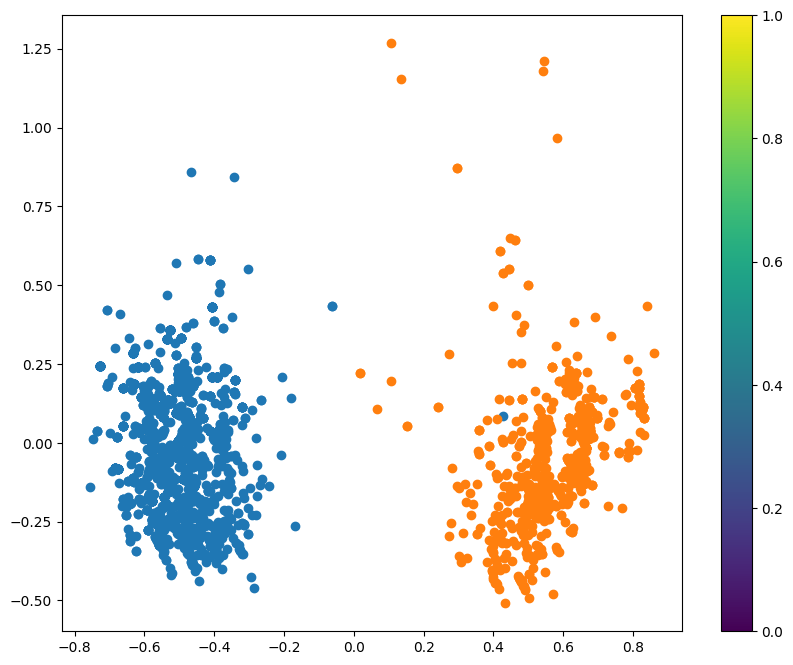

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(low_dim[:2000,0], low_dim[:2000,1])
plt.scatter(low_dim[3000:,0], low_dim[3000:,1])

plt.colorbar()

## Non linear dimension reducion methods

In [83]:
from sklearn.decomposition import  KernelPCA

In [77]:
kernel= KernelPCA(kernel='poly',n_components=2)

In [ ]:
for i in (np.linspace(0.1,1, num=10)):
    kernel= KernelPCA(kernel='poly',n_components=2, gamma=i)
    data_red=kernel.fit_transform(feature_scaled)
    plt.figure(figsize=(10,8))
    plt.scatter(data_red[:2000,0], data_red[:2000,1])
    plt.scatter(data_red[2000:,0], data_red[2000:,1])


In [79]:
np.linspace(0.001,0.1, num=10)

array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ])

In [80]:
data_red=kernel.fit_transform(feature_scaled)

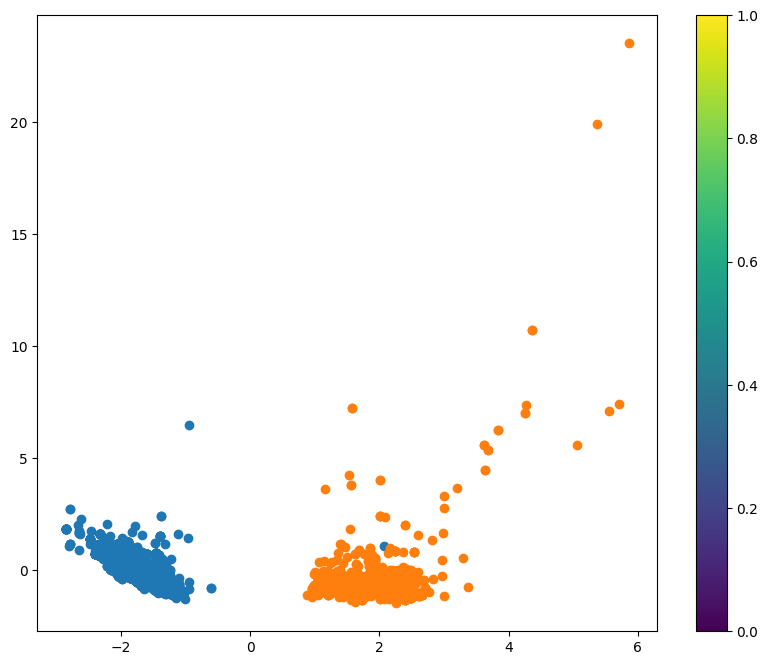

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(data_red[:2000,0], data_red[:2000,1])
plt.scatter(data_red[3000:,0], data_red[3000:,1])

plt.colorbar()

In [85]:
from sklearn.manifold import  *

In [86]:
tsne=TSNE()

In [88]:
data_red=tsne.fit_transform(feature_scaled)

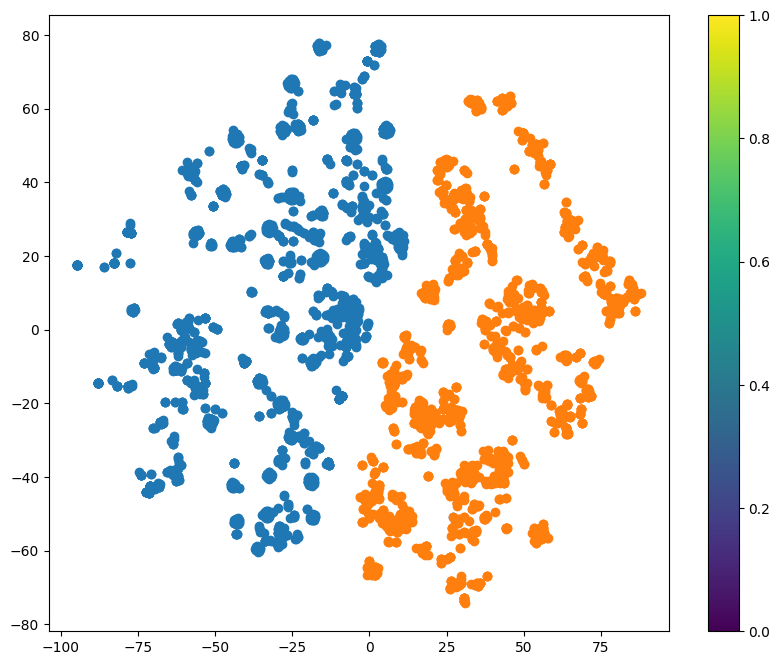

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(data_red[:2000,0], data_red[:2000,1])
plt.scatter(data_red[2000:,0], data_red[2000:,1])

plt.colorbar()